**Scikit-learn**

**108. Typical scikit-learn Workflow**

In [3]:
import numpy as np
import pandas as pd

In [4]:
#Step 1. Get Data Ready
heart_disease=pd.read_csv("Data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
#x is features matrix
x=heart_disease.drop("target",axis=1)
#y is labels
y=heart_disease["target"]

In [6]:
#Step.2 Choose right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
#To keep default parameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [7]:
#Step3. Fit model to traning data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

In [8]:
clf.fit(x_train,y_train)

RandomForestClassifier()

In [9]:
#Make a prediction
y_preds=clf.predict(x_test)

In [10]:
y_preds

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [11]:
y_test

142    1
144    1
83     1
164    1
182    0
      ..
31     1
203    0
229    0
141    1
162    1
Name: target, Length: 61, dtype: int64

In [12]:
#Step 4. Evaluate The model on training and testing data
clf.score(x_train,y_train)

1.0

In [13]:
clf.score(x_test,y_test)

0.7704918032786885

In [14]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.61      0.74      0.67        19
           1       0.87      0.79      0.82        42

    accuracy                           0.77        61
   macro avg       0.74      0.76      0.75        61
weighted avg       0.79      0.77      0.78        61



In [15]:
confusion_matrix(y_test,y_preds)

array([[14,  5],
       [ 9, 33]], dtype=int64)

In [16]:
accuracy_score(y_test,y_preds)

0.7704918032786885

In [17]:
#Step 5. Improve the model
#by Trying different amount of n_estimators
np.random.seed(1)
list=[]
for i in range(10,100,10):
    print(f"Trying model with {i} estimators...")
    clf=RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print(f"model accuracy on test dataset is {clf.score(x_test,y_test)*100:.2f}%")
    list.append(clf.score(x_test,y_test)*100)
    print(" ")
print(list)   
print(max(list))

Trying model with 10 estimators...
model accuracy on test dataset is 73.77%
 
Trying model with 20 estimators...
model accuracy on test dataset is 73.77%
 
Trying model with 30 estimators...
model accuracy on test dataset is 72.13%
 
Trying model with 40 estimators...
model accuracy on test dataset is 80.33%
 
Trying model with 50 estimators...
model accuracy on test dataset is 78.69%
 
Trying model with 60 estimators...
model accuracy on test dataset is 80.33%
 
Trying model with 70 estimators...
model accuracy on test dataset is 77.05%
 
Trying model with 80 estimators...
model accuracy on test dataset is 77.05%
 
Trying model with 90 estimators...
model accuracy on test dataset is 80.33%
 
[73.77049180327869, 73.77049180327869, 72.1311475409836, 80.32786885245902, 78.68852459016394, 80.32786885245902, 77.04918032786885, 77.04918032786885, 80.32786885245902]
80.32786885245902


In [18]:
#Step 6. Save model and load 
import pickle
pickle.dump(clf,open("Random_Forest_model_1.pkl","wb"))

In [19]:
loaded_model=pickle.load(open("Random_Forest_model_1.pkl","rb"))
loaded_model.score(x_test,y_test)    # gives score of last model(which was in above loop)

0.8032786885245902

In [20]:
import sklearn
sklearn.show_versions()


System:
    python: 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:17:27) [MSC v.1929 64 bit (AMD64)]
executable: D:\DataScienceUdemy\MachineLearning\env\python.exe
   machine: Windows-11-10.0.26100-SP0

Python dependencies:
      sklearn: 1.5.1
          pip: 24.2
   setuptools: 75.1.0
        numpy: 1.26.4
        scipy: 1.14.1
       Cython: None
       pandas: 2.2.3
   matplotlib: 3.9.2
       joblib: 1.4.2
threadpoolctl: 3.5.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: mkl
    num_threads: 2
         prefix: mkl_rt
       filepath: D:\DataScienceUdemy\MachineLearning\env\Library\bin\mkl_rt.2.dll
        version: 2023.1-Product
threading_layer: intel

       user_api: openmp
   internal_api: openmp
    num_threads: 4
         prefix: vcomp
       filepath: D:\DataScienceUdemy\MachineLearning\env\vcomp140.dll
        version: None


**112. Getting Your Data Ready:Convert Data To Numbers**

In [21]:
car_sales=pd.read_csv("Data/car-sales-extended.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [22]:
x=car_sales.drop("Price",axis=1)
y=car_sales['Price']

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [24]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

ValueError: could not convert string to float: 'Toyota'

In [25]:
#Converting to numbers 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("One_Hot",one_hot,categorical_features)], remainder="passthrough")
transformed_x=transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [26]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [27]:
dummies=pd.get_dummies(car_sales[['Make','Colour','Doors']])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [28]:
np.random.seed(1)
x_train,x_test,y_train,y_test=train_test_split(transformed_x,y,test_size=0.2)

from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.31207113535105824

**114. Getting Your Data Ready: Handling Missing Values With Pandas**

In [29]:
car_sales_missing=pd.read_csv("Data/car-sales-extended-missing-data.csv")
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

**Option 1. Handling Nan(No need in this version of Scikit-learn)**

In [30]:
car_sales_missing["Doors"].value_counts()

Doors
4.0    811
5.0     75
3.0     64
Name: count, dtype: int64

In [31]:
car_sales_missing["Make"].fillna("Missing",inplace=True)
car_sales_missing["Colour"].fillna("Missing",inplace=True)
car_sales_missing["Doors"].fillna(4,inplace=True)
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing['Odometer (KM)'].mean(),inplace=True)

C:\Users\vinayak\AppData\Local\Temp\ipykernel_8920\559354038.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_sales_missing["Make"].fillna("Missing",inplace=True)
C:\Users\vinayak\AppData\Local\Temp\ipykernel_8920\559354038.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [32]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [33]:
#Remove rows with missing price values as it is label and must have a value to train data
car_sales_missing.dropna(inplace=True)

In [34]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [35]:
len(car_sales_missing)

950

In [36]:
x=car_sales_missing.drop("Price", axis=1)
y=car_sales_missing["Price"]

In [37]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
transformed_x=transformer.fit_transform(x)
transformed_x

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3800 stored elements and shape (950, 15)>

In [38]:
pd.DataFrame(transformed_x)

,0
0,<Compressed Sparse Row sparse matrix of dtype ...
1,<Compressed Sparse Row sparse matrix of dtype ...
2,<Compressed Sparse Row sparse matrix of dtype ...
3,<Compressed Sparse Row sparse matrix of dtype ...
4,<Compressed Sparse Row sparse matrix of dtype ...
...,...
945,<Compressed Sparse Row sparse matrix of dtype ...
946,<Compressed Sparse Row sparse matrix of dtype ...
947,<Compressed Sparse Row sparse matrix of dtype ...
948,<Compressed Sparse Row sparse matrix of dtype ...


**115. Getting Your Data Ready: Handling Missing Values With Scikit-learn**

**Option 2: Fill missing values with Scikit-learn**

In [39]:
car_sales_missing=pd.read_csv("Data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [40]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [41]:
car_sales_missing.dropna(subset=["Price"],inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [42]:
x=car_sales_missing.drop(["Price"],axis=1)
y=car_sales_missing["Price"]

In [43]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

cat_imputer=SimpleImputer(strategy="constant",fill_value="missing")
door_imputer=SimpleImputer(strategy="constant",fill_value=4)
num_imputer=SimpleImputer(strategy="mean")

cat_features=["Make","Colour"]
door_features=["Doors"]
num_features=["Odometer (KM)"]

#Creating imputer that fills data
imputer=ColumnTransformer([("cat_imputer",cat_imputer,cat_features),("door_imputer",door_imputer,door_features),("num_imputer",num_imputer,num_features)])

filled_x=imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [44]:
car_sales_filled_x=pd.DataFrame(filled_x,columns=["Make","Colour","Doors","Odometer (KM)"])
car_sales_filled_x

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [45]:
car_sales_filled_x.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [46]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
transformed_x=transformer.fit_transform(car_sales_filled_x)
transformed_x

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3800 stored elements and shape (950, 15)>

In [47]:
np.random.seed(1)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(transformed_x,y,test_size=0.2)

model=RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.25158720734485374

**118. Choosing right model for your Data (Regression)**

* Scikit-learn refers to ML models/algorithms as estimators.
* Classification problem-predicting a category(heart disease or not,only two values here)
    * Classification estimator called Classifier is used("clf" in short)
* Regression problem=predicting a number(selling price of a car)
* Refer: https://scikit-learn.org/1.3/tutorial/machine_learning_map/
* Housing Dataset: https://scikit-learn.org/1.3/datasets/real_world.html#california-housing-dataset

In [48]:
from sklearn.datasets import load_iris

In [49]:
data=load_iris()

In [57]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [58]:
housing=pd.read_csv("Data/cal_housing.data",header=None)
housing

,0,1,2,3,4,5,6,7,8
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [59]:
x=pd.read_csv("Data/cal_housing.domain",header=None)
x

,0
0,longitude: continuous.
1,latitude: continuous.
2,housingMedianAge: continuous.
3,totalRooms: continuous.
4,totalBedrooms: continuous.
5,population: continuous.
6,households: continuous.
7,medianIncome: continuous.
8,medianHouseValue: continuous.


In [60]:
housing_df=housing.set_axis(["longitude","latitude","housingMedianAge","totalRooms","totalBedrooms","population","households","medianIncome","medianHouseValue"],axis=1,)
housing_df

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [61]:
np.random.seed(1)
x=housing_df.drop("medianHouseValue",axis=1)
y=housing_df['medianHouseValue']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

* Ridge Model

In [62]:
#Using Ridge
from sklearn.linear_model import Ridge
model=Ridge()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.6283459798947879

* If Ridge doesn't work try ensemble model
* Ensemble methods combine predictions of sveral base estimators(models) for better results
* Refer:
    * Ensemble Methodes - https://scikit-learn.org/0.16/modules/ensemble.html
    * Random forest algorithm - https://williamkoehrsen.medium.com/random-forest-simple-explanation-377895a60d2d
    * RandomForestRegressor - https://scikit-learn.org/0.16/modules/generated/sklearn.ensemble.RandomForestRegressor.html

* RandomForestRegressor 

In [63]:
#Using RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8181142169690621

* Coefficient of Determination(R^2): one of Regression Metrics
    * formula1=R^2 where R is Correlation Coefficient
    * formula2=1-(RSS(Residual Sum Of Squares)/TSS(Total Sum Of Squares))
    * Refer Example - https://www.cuemath.com/coefficient-of-determination-formula/

**122. Choosing the right model for your Data 3 (Classsification)**

* `SVC`, `NuSVC` and `LinearSVC` are classes capable of performing binary and multi-class classification on a dataset.
* Refer :
    * Map to choose model - https://scikit-learn.org/1.3/tutorial/machine_learning_map/
    * Support Vector Machine (SVM) - https://scikit-learn.org/1.3/modules/svm.html#classification
    * LinearSVC : https://scikit-learn.org/1.3/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC

* Linear SVC

In [64]:
heart_disease=pd.read_csv("Data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [65]:
np.random.seed(1)
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [66]:
from sklearn.svm import LinearSVC
clf=LinearSVC()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.7377049180327869

* RandomForestClassifier (Ensemble Method)

In [67]:
heart_disease=pd.read_csv("Data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [68]:
np.random.seed(2)
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [69]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.8852459016393442

* If you have `Structured Data`, use `Ensemble Methods`
* If you have `Unstructured Data`, use `Deep Learning` or `Transfer Learning`

**123. Fitting a model to the Data** 
Already done, see above example

## 124. Making Predictions with our model

**2 ways:**
* `predict()`
* `predict_proba()`

* 1st way: `predict()`

In [70]:
clf.predict(x_test)

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1], dtype=int64)

In [71]:
#Comparing predictions to true labels (Already we have done it using clf.score() and also by accuracy_score (3 Ways))
y_preds=clf.predict(x_test)
np.mean(y_preds==y_test)

0.8852459016393442

In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8852459016393442

In [73]:
clf.score(x_test,y_test)

0.8852459016393442

## 125. predict() vs predict_proba()

* 2nd way: `predict_proba()`
    * It returns probabilities of classification labels. The one with probability greater than 0.5 will be given as prdicted_value.
    * eg. here heart disease and no heart disease(2 classes of labels), 1st probability is of 0(not having heart disease) and 2nd is of 1(have heart disease)

In [74]:
clf.predict_proba(x_test[:5])

array([[0.17, 0.83],
       [0.49, 0.51],
       [0.29, 0.71],
       [0.11, 0.89],
       [0.73, 0.27]])

In [75]:
clf.predict(x_test[:5])

array([1, 1, 1, 1, 0], dtype=int64)

## 126. Making predictions with our Model (Regression)
* Using `predict()`

In [76]:
housing_df

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [77]:
np.random.seed(1)
x=housing_df.drop("medianHouseValue",axis=1)
y=housing_df["medianHouseValue"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8181142169690621

In [78]:
model.score(x_train,y_train)

0.9748752421323377

In [79]:
y_preds=model.predict(x_test)
y_preds[:10]

array([336531.1 ,  62893.  , 242644.  , 132661.04, 241595.  , 303488.13,
       224651.  , 181041.  , 143326.  , 147236.  ])

In [80]:
np.array(y_test[:10])

array([355000.,  70700., 229400., 112500., 225400., 263000., 226800.,
       166200., 118000., 156300.])

In [81]:
len(y_preds),len(y_test)

(4128, 4128)

In [82]:
# Comparing predictions to true values
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

31599.757478197676

In [83]:
np.mean(y_preds==y_test) # Can't be applicable here, as it is regression and not classification, so every value differs by different amount and rarely can be same

0.006298449612403101

## 127. Evaluating A Machine Learning Model (Score) Part 1
* 3 Ways to Evaluate Scikit-learn models/estimators:
    * Estimator's built-in `score()` method
    * The `scoring` parameter
    * Problem-specific metric functions
* Refer: https://scikit-learn.org/1.5/modules/model_evaluation.html

### `score` method
#### In Regression, It returns Coefficient of determination(R^2).
#### In Classification, It returns mean Accuracy.
Highest is 1.0, lowest is 0.0. If model predicted test values perfectly correct, then it is 1.0. If it predicted mean of test values, then it is 0.0.

* Classification problem

In [84]:
np.random.seed(1)
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.7868852459016393

In [85]:
clf.score(x_train,y_train) # It's highest(1) as it is classification only with 2 classes of labels

1.0

* Note - Changing n_estimators will change score. Also, higher the n_estimator number, longer will be the time to fit the model.

## 128. Evaluating A Machine Learning Model (Score) Part 2

* Regression problem (we have done this before on housing problem)

## 129. Evaluating A Machine Learning Model 2 (Cross Validation)

### `scoring` Parameter

In [86]:
np.random.seed(1)
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf=RandomForestClassifier()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.7868852459016393

In [87]:
cross_val_score(clf,x,y)

array([0.81967213, 0.86885246, 0.73770492, 0.81666667, 0.75      ])

#### Cross Validation: Model is trained on k different versions of training data and evaluated on k different versions of test data. Hence, called k-fold Cross Validation.
#### `cross_val_score` by default has k=5

In [88]:
cross_val_score(clf,x,y,cv=10)

array([0.90322581, 0.80645161, 0.83870968, 0.9       , 0.83333333,
       0.8       , 0.73333333, 0.83333333, 0.73333333, 0.73333333])

In [89]:
np.random.seed(1)
clf_single_score=clf.score(x_test,y_test)
clf_cross_val_score=np.mean(cross_val_score(clf,x,y))
clf_single_score,clf_cross_val_score

(0.7868852459016393, 0.8183060109289617)

#### `scoring` parameter is by default None. Means it uses scoring parameter of the passed estimator. (In the above example, it is Mean Accuracy as it is Classification.

## Classification Model Evaluation Metrics
#### 1. Accuracy
#### 2. Area Under ROC Curve
#### 3. Confusion Matrix
#### 4. Classification Report

## 130. Evaluating a Classification Model 1 (Accuracy)

In [90]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(1)
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf=RandomForestClassifier()
clf.fit(x_train,y_train)
cross_val_score=cross_val_score(clf,x,y)
clf.score(x_test,y_test),cross_val_score

(0.7868852459016393,
 array([0.81967213, 0.86885246, 0.73770492, 0.81666667, 0.75      ]))

In [91]:
np.mean(cross_val_score)

0.7985792349726776

In [92]:
print(f"Heart Disease Classifier Cross Validated Accuracy:{np.mean(cross_val_score)*100:.2f}%")

Heart Disease Classifier Cross Validated Accuracy:79.86%


## 131. Evaluating a Classification Model 2 (ROC Curve)

#### Area Under Receiver Operating Characteristic Curve (AUC/ROC)
* ROC curves and AUC metrics are evaluation metrics for binary classification models (a model which predicts one thing or another, such as heart disease or not).
* **Area Under Curve (AUC)**: The AUC metric tells you how well your model is at choosing between classes (for example, how well it is at deciding whether someone has heart disease or not). A perfect model will get an AUC score of 1.
* **ROC Curve**: A comparison of model's True Positive Rate(TPR) vs model's False Positive Rate(FPR)

* **True Positive**: Model predicts 1, when truth is 1.
* **False Positive**: Model predicts 1, when truth is 0.
* **True Negative**: Model predicts 0, when truth is 0.
* **False Negative**: Model predicts 0, when truth is 1.
* Refer:
    * https://www.youtube.com/watch?v=4jRBRDbJemM
    * https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
    * https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc

In [93]:
np.random.seed(1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [94]:
clf.fit(x_train,y_train)
from sklearn.metrics import roc_curve
y_probs=clf.predict_proba(x_test)
y_probs[:10],len(x_test)

(array([[0.84, 0.16],
        [0.21, 0.79],
        [0.81, 0.19],
        [0.98, 0.02],
        [0.85, 0.15],
        [0.94, 0.06],
        [0.93, 0.07],
        [0.32, 0.68],
        [0.99, 0.01],
        [0.11, 0.89]]),
 61)

In [95]:
y_probs_positive=y_probs[:,1]
y_probs_positive

array([0.16, 0.79, 0.19, 0.02, 0.15, 0.06, 0.07, 0.68, 0.01, 0.89, 0.64,
       0.4 , 0.87, 0.4 , 0.38, 0.74, 0.96, 0.16, 0.85, 0.66, 0.87, 0.11,
       0.63, 0.78, 0.88, 0.95, 0.03, 0.89, 0.76, 0.94, 1.  , 0.95, 0.79,
       0.63, 0.11, 0.66, 0.39, 0.31, 0.69, 0.24, 0.84, 0.09, 0.28, 0.03,
       0.48, 0.83, 0.1 , 0.46, 0.71, 0.57, 1.  , 0.72, 0.5 , 0.67, 0.93,
       0.9 , 0.54, 0.04, 0.69, 0.1 , 0.28])

In [96]:
fpr,tpr,thresholds=roc_curve(y_test,y_probs_positive)
fpr,tpr,thresholds

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.03333333, 0.03333333, 0.06666667,
        0.06666667, 0.06666667, 0.16666667, 0.23333333, 0.23333333,
        0.26666667, 0.26666667, 0.26666667, 0.26666667, 0.33333333,
        0.33333333, 0.4       , 0.4       , 0.46666667, 0.46666667,
        0.46666667, 0.5       , 0.56666667, 0.6       , 0.73333333,
        0.86666667, 0.93333333, 1.        ]),
 array([0.        , 0.06451613, 0.09677419, 0.16129032, 0.25806452,
        0.32258065, 0.35483871, 0.38709677, 0.4516129 , 0.4516129 ,
        0.51612903, 0.58064516, 0.58064516, 0.58064516, 0.64516129,
        0.67741935, 0.70967742, 0.77419355, 0.83870968, 0.83870968,
        0.87096774, 0.87096774, 0.90322581, 0.90322581, 0.96774194,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ]),
 array([ inf, 1.  , 0.96, 0.95, 0.9 , 0.89, 0.88, 0.87, 0.84, 0.83, 0.79,
        0.76, 0.71

## 132. Evaluating a Classification Model 3 (ROC Curve)

#### Creating function for plotting ROC Curve

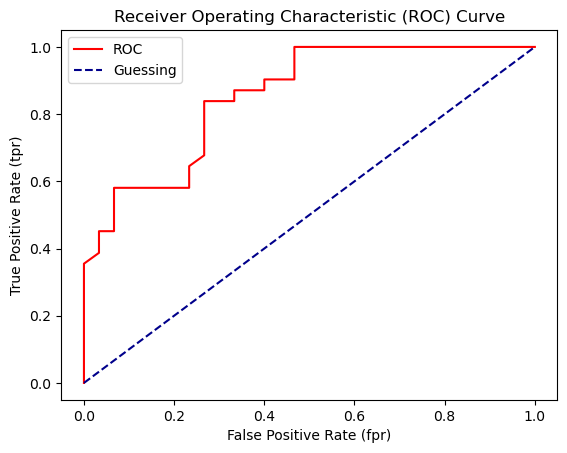

In [97]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    # Plot ROC Curve
    plt.plot(fpr,tpr,color="red",label="ROC")
    
    # Plot line with no predictive power (baseline)(To Compare our model to some other arbitrary model which jUst pREdiCts nothing.
    plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="Guessing")

    #Customize the plot
    plt.xlabel("False Positive Rate (fpr)")
    plt.ylabel("True Positive Rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr,tpr)

In [98]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_probs_positive)

0.853763440860215

#### Plot Perfect ROC Curve and AUC score (1.0)

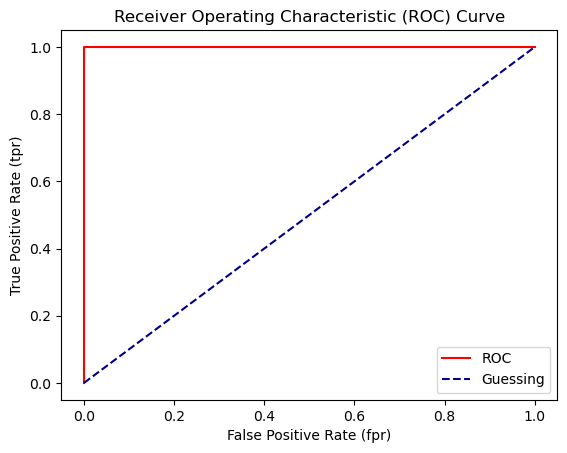

In [99]:
fpr,tpr,threshold=roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [100]:
roc_auc_score(y_test,y_test)

1.0

## 134. Evaluating A Classification Model 4 (Confusion Matrix)

**Confusion Matrix**: Compares labels predicted by model and the actual ones

In [101]:
from sklearn.metrics import confusion_matrix
y_preds=clf.predict(x_test)
confusion_matrix(y_test,y_preds)

array([[22,  8],
       [ 5, 26]], dtype=int64)

In [103]:
pd.crosstab(y_test,y_preds,rownames=["Actual Labels"],colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,22,8
1,5,26


## Installing conda package into the current environment using jupyter notebook

In [109]:
!dir

 Volume in drive D has no label.
 Volume Serial Number is 6803-A8A2

 Directory of D:\DataScienceUdemy\MachineLearning

09-12-2024  09:34    <DIR>          .
06-12-2024  12:18    <DIR>          ..
06-12-2024  12:28    <DIR>          .ipynb_checkpoints
08-12-2024  10:00    <DIR>          Data
06-12-2024  19:22    <DIR>          env
09-12-2024  07:58           615,173 Random_Forest_model_1.pkl
06-12-2024  12:19                19 README.md
09-12-2024  09:34           272,447 Scikit-learn.ipynb
               3 File(s)        887,639 bytes
               5 Dir(s)  74,285,355,008 bytes free


In [110]:
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Retrieving notices: ...working... done
Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: D:\DataScienceUdemy\MachineLearning\env

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    seaborn-0.13.2             |  py312haa95532_0         714 KB
    ------------------------------------------------------------
                                           Total:         714 KB

The following NEW packages will be INSTALLED:

  seaborn            pkgs/main/win-64::seaborn-0.13.2-py312haa95532_0 



Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


<Axes: >

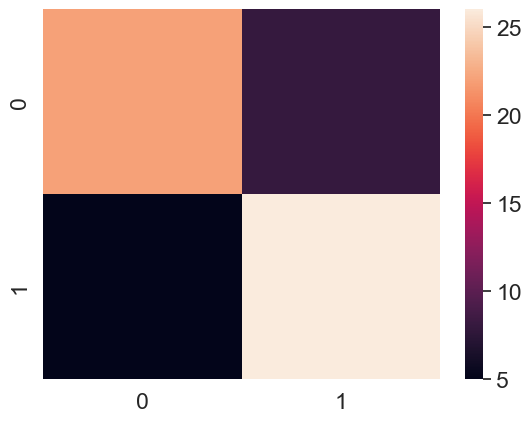

In [113]:
import seaborn as sns

sns.set(font_scale=1.5)
conf_mat=confusion_matrix(y_test,y_preds)
sns.heatmap(conf_mat)

## 135. Evaluating A Classification Model 5 (Confusion Matrix)

### Creating Confusion Matrix using Scikit-learn
* Sklearn version 1.0+ is needed
* Refer: https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

In [116]:
import sklearn
sklearn.__version__

'1.5.1'

In [117]:
clf

RandomForestClassifier()

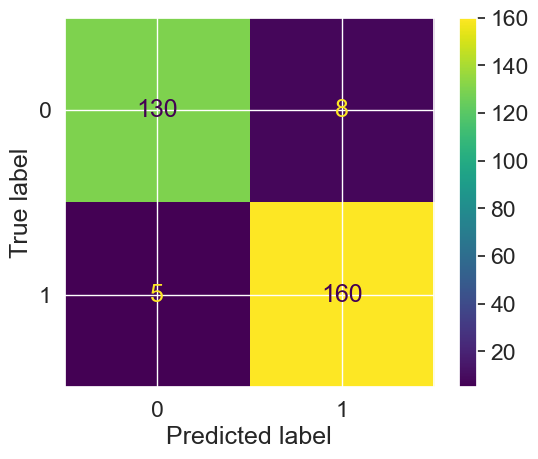

In [119]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf,X=x,y=y)

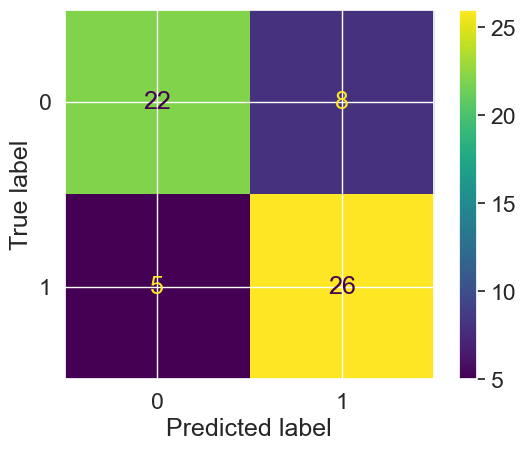

In [120]:
ConfusionMatrixDisplay.from_predictions(y_test,y_preds)

## 136. Evaluating A Classification Model 6 (Classification Report)

In [122]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77        30
           1       0.76      0.84      0.80        31

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



* **Precision**: Percentage of `correct positive` predictions relative to `total positive predictions`. Model which predicts no false positives has precision 1.0.
    ``Precision=TP/TP+FP``

* **Recall**: Percentage of `correct positive` predictions relative to total `actual positives`. Model which predicts no false negatives has precision 1.0.
    `Recall=TP/TP+FN`

* **F1 Score**: A weighted harmonic mean of precision and recall. The closer to 1, the better the model. Perfect Model has F1 score 1.0.                
    `F1 Score: 2 * (Precision * Recall) / (Precision + Recall)`
* **Support**: Number of samples each metric was calculated on
* **Accuracy**: Accuracy of model in decimal form. Perfect model has accuracy 1.0.                                                                      
    `Accuracy=TP+TN/TP+TN+FP+FN`
* **Macro avg**:Short for Macro Average. Average Precision, Recall and F1 score between classes. Macro average doesn't take class imbalance into effect. If you have class imbalance, pay attention to this metric. (Class imbalance means lot of difference in the number of instances of classes)
* **Weighted avg**: Short for Weighted Average. Weighted Average of Precision Recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples are there in each classes. The metric will favour the majority class. (eg. will have high value when one class outperforms another due to having more samples)

* When Prcision and Recall becomes valuable.

In [128]:
disease_true=np.zeros(1000)
disease_true[0]=1

disease_preds=np.zeros(1000) #predicts no one has disease. Allthe predictions are zeros.
pd.DataFrame(classification_report(disease_true,disease_preds,output_dict=True))  #If output_dict is kept false(which is default), gives error

D:\DataScienceUdemy\MachineLearning\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\DataScienceUdemy\MachineLearning\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\DataScienceUdemy\MachineLearning\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.9990,0.0,0.999,0.49950,0.998001
recall,1.0000,0.0,0.999,0.50000,0.999000
f1-score,0.9995,0.0,0.999,0.49975,0.998500
support,999.0000,1.0,0.999,1000.00000,1000.000000


## 137. Evaluating A Regression Model 1 (R2 Score)
* Refer: https://scikit-learn.org/1.5/modules/model_evaluation.html#regression-metrics
* Covered here-
    * R^2(r-squared) or Coefficient of Determination
    * Mean Absolute Error (MAE)
    * Mear Squared Error (MSE)

* ### R^2
    * Compares model prediction to the mean of the target. values can range from negative infinity (very poor model) to 1.
    * Eg. If all your model does is to predict mean of the targets, it's R^2 value will be 0.0. If your model perfectly predicts a range of numbers, it's R^2 will be 1.0.

In [133]:
np.random.seed(1)
x=housing_df.drop("medianHouseValue",axis=1)
y=housing_df['medianHouseValue']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8181142169690621

In [134]:
y_test.mean()

203338.8277616279

In [136]:
from sklearn.metrics import r2_score

#Fill an array with y_test_mean
y_test_mean=np.full(len(y_test),y_test.mean())
y_test_mean[:10]

array([203338.82776163, 203338.82776163, 203338.82776163, 203338.82776163,
       203338.82776163, 203338.82776163, 203338.82776163, 203338.82776163,
       203338.82776163, 203338.82776163])

In [137]:
r2_score(y_true=y_test,y_pred=y_test_mean) 

0.0

In [139]:
r2_score(y_true=y_test,y_pred=y_test)  #Gives perfect score

1.0

## 138.Evaluating A Regression Model 2 (MAE)

* ### Mean Absolute Error (MAE)
    * MAE is the average of absolute differences between predictions and actual values.
    * Gives idea of how wrong your predictions are.

In [142]:
from sklearn.metrics import mean_absolute_error

y_preds=model.predict(x_test)
mean_absolute_error(y_true=y_test,y_pred=y_preds)

31599.757478197676

In [146]:
df=pd.DataFrame(data={"Actual Values":y_test,"Predicted Values":y_preds})
df["Difference"]=df['Predicted Values']-df['Actual Values']
df.head(10)

,Actual Values,Predicted Values,Difference
4712,355000.0,336531.10,-18468.90
2151,70700.0,62893.00,-7807.00
15927,229400.0,242644.00,13244.00
82,112500.0,132661.04,20161.04
8161,225400.0,241595.00,16195.00
6636,263000.0,303488.13,40488.13
17333,226800.0,224651.00,-2149.00
19081,166200.0,181041.00,14841.00
13298,118000.0,143326.00,25326.00
7157,156300.0,147236.00,-9064.00


In [148]:
np.abs(df["Difference"]).mean()

31599.757478197676

## 138.Evaluating A Regression Model 2 (MAE)

* ### Mean Squared Error (MSE)
    * MAE is the mean of the square of absolute differences (errors) between predictions and actual values.
    * Gives idea of how wrong your predictions are.

In [149]:
from sklearn.metrics import mean_squared_error

y_preds=model.predict(x_test)
mean_squared_error(y_true=y_test,y_pred=y_preds)

2385779161.75747

In [152]:
df["Squared_Differences"]=np.square(df['Difference'])  #Can be done using "**" also.
df.head(10)

,Actual Values,Predicted Values,Difference,Squared_Differences
4712,355000.0,336531.10,-18468.90,3.411003e+08
2151,70700.0,62893.00,-7807.00,6.094925e+07
15927,229400.0,242644.00,13244.00,1.754035e+08
82,112500.0,132661.04,20161.04,4.064675e+08
8161,225400.0,241595.00,16195.00,2.622780e+08
6636,263000.0,303488.13,40488.13,1.639289e+09
17333,226800.0,224651.00,-2149.00,4.618201e+06
19081,166200.0,181041.00,14841.00,2.202553e+08
13298,118000.0,143326.00,25326.00,6.414063e+08
7157,156300.0,147236.00,-9064.00,8.215610e+07


In [153]:
df['Squared_Differences'].mean()

2385779161.75747

In [169]:
# MSE with large error data (only one value changed)
df_large_error=df.copy()
df_large_error.iloc[0]=16000000000
df_large_error.head(10)

,Actual Values,Predicted Values,Difference,Squared_Differences
4712,1.600000e+10,1.600000e+10,1.600000e+10,1.600000e+10
2151,7.070000e+04,6.289300e+04,-7.807000e+03,6.094925e+07
15927,2.294000e+05,2.426440e+05,1.324400e+04,1.754035e+08
82,1.125000e+05,1.326610e+05,2.016104e+04,4.064675e+08
8161,2.254000e+05,2.415950e+05,1.619500e+04,2.622780e+08
6636,2.630000e+05,3.034881e+05,4.048813e+04,1.639289e+09
17333,2.268000e+05,2.246510e+05,-2.149000e+03,4.618201e+06
19081,1.662000e+05,1.810410e+05,1.484100e+04,2.202553e+08
13298,1.180000e+05,1.433260e+05,2.532600e+04,6.414063e+08
7157,1.563000e+05,1.472360e+05,-9.064000e+03,8.215610e+07


In [170]:
df_large_error["Squared_Differences"].mean()

2389572499.871033

In [171]:
# MSE with large error data (100 values changed)
df_large_error=df.copy()
df_large_error.iloc[1:100]=16000000000
df_large_error.head(10)

,Actual Values,Predicted Values,Difference,Squared_Differences
4712,3.550000e+05,3.365311e+05,-1.846890e+04,3.411003e+08
2151,1.600000e+10,1.600000e+10,1.600000e+10,1.600000e+10
15927,1.600000e+10,1.600000e+10,1.600000e+10,1.600000e+10
82,1.600000e+10,1.600000e+10,1.600000e+10,1.600000e+10
8161,1.600000e+10,1.600000e+10,1.600000e+10,1.600000e+10
6636,1.600000e+10,1.600000e+10,1.600000e+10,1.600000e+10
17333,1.600000e+10,1.600000e+10,1.600000e+10,1.600000e+10
19081,1.600000e+10,1.600000e+10,1.600000e+10,1.600000e+10
13298,1.600000e+10,1.600000e+10,1.600000e+10,1.600000e+10
7157,1.600000e+10,1.600000e+10,1.600000e+10,1.600000e+10


In [172]:
df_large_error["Squared_Differences"].mean()

2718354343.4042025

## 140. Machine Learning Model Evaluation
Evaluating the results of a machine learning model is as important as building one.
But just like how different problems have different machine learning models, different machine learning models have different evaluation metrics.
Below are some of the most important evaluation metrics you'll want to look into for classification and regression models.

### Classification Model Evaluation Metrics/Techniques
* **Accuracy** - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
* **Precision** - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
* **Recall** - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* **F1 score** - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* **Confusion matrix** - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagonal line).
* **Cross-validation** - Splits your dataset into multiple parts and train and tests your model on each part then evaluates performance as an average.
* **Classification report** - Sklearn has a built-in function called classification_report() which returns some of the main classification metrics such as precision, recall and f1-score.
* **ROC Curve** - Also known as receiver operating characteristic is a plot of true positive rate versus false-positive rate.
* **Area Under Curve (AUC) Score** - The area underneath the ROC curve. A perfect model achieves an AUC score of 1.0.

### Which classification metric should you use?
* **Accuracy** is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).
* **Precision** and **Recall** become more important when classes are imbalanced.
* If false-positive predictions are worse than false-negatives, aim for **higher precision.**
* If false-negative predictions are worse than false-positives, aim for **higher recall.**
* F1-score is a combination of precision and recall.
* A confusion matrix is always a good way to visualize how a classification model is going.

### Regression Model Evaluation Metrics/Techniques
* **R^2 (pronounced r-squared) or the coefficient of determination** - Compares your model's predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.
* **Mean absolute error (MAE)** - The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions were.
* **Mean squared error (MSE)** - The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors).

### Which regression metric should you use?
* R2 is similar to accuracy. It gives you a quick indication of how well your model might be doing. Generally, the closer your R2 value is to 1.0, the better the model. But it doesn't really tell exactly how wrong your model is in terms of how far off each prediction is.
* MAE gives a better indication of how far off each of your model's predictions are on average.
* As for MAE or MSE, because of the way MSE is calculated, squaring the differences between predicted values and actual values, it amplifies larger differences. Let's say we're predicting the value of houses (which we are).
  Pay more attention to MAE: When being $10,000 off is twice as bad as being $5,000 off.
  Pay more attention to MSE: When being $10,000 off is more than twice as bad as being $5,000 off.

### For more resources on evaluating a machine learning model, be sure to check out the following resources:
* Scikit-Learn documentation for metrics and scoring (quantifying the quality of predictions) - https://scikit-learn.org/stable/modules/model_evaluation.html
* Beyond Accuracy: Precision and Recall by Will Koehrsen - https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c
* Stack Overflow answer describing MSE (mean squared error) and RSME (root mean squared error) - https://stackoverflow.com/questions/17197492/is-there-a-library-function-for-root-mean-square-error-rmse-in-python/37861832#37861832

## 141. Evaluating A Model with Cross Validation and Scoring Parameter

* ### `scoring` Parameter for Classification (accuracy,precision,recall,f1)

In [173]:
np.random.seed(1)
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.7868852459016393

In [184]:
np.random.seed(1)
from sklearn.model_selection import cross_val_score
cv_None=cross_val_score(clf,x,y,scoring=None)
cv_None

array([0.80327869, 0.90163934, 0.80327869, 0.81666667, 0.76666667])

In [185]:
print(f"Cross Validated score for scoring=None: {np.mean(cv_None)*100:.2f}%")

Cross Validated score for scoring=None: 81.83%


In [187]:
np.random.seed(1)
cv_accuracy=cross_val_score(clf,x,y,scoring="accuracy")
cv_accuracy

array([0.80327869, 0.90163934, 0.80327869, 0.81666667, 0.76666667])

In [188]:
print(f"Cross Validated score for scoring=accuracy: {np.mean(cv_accuracy)*100:.2f}%")

Cross Validated score for scoring=accuracy: 81.83%


In [190]:
np.random.seed(1)
cv_precision=cross_val_score(clf,x,y,scoring="precision")
cv_precision

array([0.8       , 0.93548387, 0.83870968, 0.84375   , 0.74358974])

In [191]:
print(f"Cross Validated score for scoring=precision: {np.mean(cv_precision)*100:.2f}%")

Cross Validated score for scoring=precision: 83.23%


In [192]:
np.random.seed(1)
cv_recall=cross_val_score(clf,x,y,scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.78787879, 0.81818182, 0.87878788])

In [193]:
print(f"Cross Validated score for scoring=recall: {np.mean(cv_recall)*100:.2f}%")

Cross Validated score for scoring=recall: 84.24%


In [194]:
np.random.seed(1)
cv_f1=cross_val_score(clf,x,y,scoring="f1")
cv_f1

array([0.82352941, 0.90625   , 0.8125    , 0.83076923, 0.80555556])

In [195]:
print(f"Cross Validated score for scoring=f1: {np.mean(cv_f1)*100:.2f}%")

Cross Validated score for scoring=f1: 83.57%


* ### `scoring` Parameter for Regression (r^2,mae,mse)

In [196]:
np.random.seed(1)
x=housing_df.drop("medianHouseValue",axis=1)
y=housing_df["medianHouseValue"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8181142169690621

In [199]:
np.random.seed(1)
from sklearn.model_selection import cross_val_score
cv_none=cross_val_score(model,x,y,scoring=None)
cv_none

array([0.38988788, 0.62111937, 0.69336203, 0.58154633, 0.61360321])

In [200]:
print(f"Cross Validated score for scoring=None Regression: {np.mean(cv_none)*100:.2f}%")

Cross Validated score for scoring=None Regression: 57.99%


In [201]:
np.random.seed(1)
cv_r2=cross_val_score(model,x,y,scoring="r2")
cv_r2

array([0.38988788, 0.62111937, 0.69336203, 0.58154633, 0.61360321])

In [202]:
print(f"Cross Validated score for scoring=r2 Regression: {np.mean(cv_r2)*100:.2f}%")

Cross Validated score for scoring=r2 Regression: 57.99%


In [203]:
np.random.seed(1)
cv_mae=cross_val_score(model,x,y,scoring="neg_mean_absolute_error")
cv_mae

array([-58850.93349079, -50062.09455669, -47600.44823401, -48373.94789729,
       -52355.42550872])

In [207]:
print(f"Cross Validated score for scoring=mae Regression: {np.mean(cv_mae)}")

Cross Validated score for scoring=mae Regression: -51448.5699375


In [208]:
np.random.seed(1)
cv_mse=cross_val_score(model,x,y,scoring="neg_mean_squared_error")
cv_mse

array([-6.55426524e+09, -4.43503693e+09, -4.41108106e+09, -4.90923313e+09,
       -5.63041385e+09])

In [209]:
print(f"Cross Validated score for scoring=mse Regression: {np.mean(cv_mse)}")

Cross Validated score for scoring=mse Regression: -5188006040.951252


## 142. Evaluating A Model with Scikit-learn functions
* Using sklearn.metrics
* Refer: https://scikit-learn.org/1.5/modules/model_evaluation.html#using-multiple-metric-evaluation

* ### For Classification

In [210]:
np.random.seed(1)
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.7868852459016393

In [211]:
y_preds=clf.predict(x_test)

In [212]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
accuracy_score(y_true=y_test,y_pred=y_preds)

0.7868852459016393

In [213]:
precision_score(y_true=y_test,y_pred=y_preds)

0.7647058823529411

In [214]:
recall_score(y_true=y_test,y_pred=y_preds)

0.8387096774193549

In [215]:
f1_score(y_true=y_test,y_pred=y_preds)

0.8

* ### For Regression

In [217]:
np.random.seed(1)
x=housing_df.drop("medianHouseValue",axis=1)
y=housing_df["medianHouseValue"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8181142169690621

In [218]:
y_preds=model.predict(x_test)

In [219]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
r2_score(y_true=y_test,y_pred=y_preds)

0.8181142169690621

In [220]:
mean_absolute_error(y_true=y_test,y_pred=y_preds)

31599.757478197676

In [221]:
mean_squared_error(y_true=y_test,y_pred=y_preds)

2385779161.75747

## 143. Improving A Machine Learning Model
* First prediction - baseline prediction
* First model - baseline model
* #### From a Data Perspective
    * Could we collect more data? (more, the better)
    * Could we improve our data? (more features, the better)
* #### From A Model Perspective
    * Is there a better model we could use?
    * Could we improve the current model? (Improving the hyperparameters)
* **Data Parameters**: Patterns in data that the machine learning model finds
* **Difference between parameters and hyperparameters**:
    * Parameters: Machine learning model will find parameters in data on its own.
    * Hyperparameters: Hyperparameters are settings on the model that you can adjust to improve its ability to find patterns.
* 3 ways to adjust hyperparameters-
    * By hand
    * Randomly with RandomSearchCV
    * Exhaustively with GridSearchCV

In [224]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()
clf.get_params()   # list of hyperparameters that we can adjust

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## 144. Tuning Hyperparameters

* ### By hand (Making Validation Set along with Training and Testing)

Try and adjust
* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [230]:
def evaluate_preds_classification(y_test,y_preds):
    accuracy=accuracy_score(y_test,y_preds)
    precision=precision_score(y_test,y_preds)
    recall=recall_score(y_test,y_preds)
    f1=f1_score(y_test,y_preds)

    metric_dict={"accuracy":round(accuracy,2),
                 "precision":round(precision,2),
                 "recall":round(recall,2),
                 "f1":round(f1,2)}
    print(f"Accuracy:{accuracy*100:.2f}%")
    print(f"Precision:{precision:.2f}")
    print(f"Recall:{recall:.2f}")
    print(f"Precision:{f1:.2f}")
    return metric_dict

In [256]:
# Splitting the Data into train, valid, test
np.random.seed(1)

# Shuffling the Data
heart_disease_shuffled=heart_disease.sample(frac=1)

# Split into x and y
x=heart_disease_shuffled.drop("target",axis=1)
y=heart_disease_shuffled["target"]

# Finding the indices for splitting data (70%traning, 15-15% validation and test)
train_split=round(0.7*len(heart_disease_shuffled))
valid_split=round(train_split+(0.15*len(heart_disease_shuffled)))

# Splitting the Data using slicing
x_train,y_train=x[:train_split],y[:train_split]
x_valid,y_valid=x[train_split:valid_split],y[train_split:valid_split]
x_test,y_test=x[valid_split:],y[valid_split:]

len(x_train),len(x_valid),len(x_test)

(212, 45, 46)

In [257]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(1)
clf=RandomForestClassifier()
clf.fit(x_train,y_train)
y_preds=clf.predict(x_valid)

# Evaluate Model on Validation Set
baseline_metrics=evaluate_preds_classification(y_valid,y_preds)
baseline_metrics

Accuracy:88.89%
Precision:0.92
Recall:0.89
Precision:0.91


{'accuracy': 0.89, 'precision': 0.92, 'recall': 0.89, 'f1': 0.91}

In [258]:
np.random.seed(1)
# Create a second Classifier with different hyperparameters
clf2=RandomForestClassifier(n_estimators=600)
clf2.fit(x_train,y_train)
y_preds_2=clf2.predict(x_valid)
clf2_metrics=evaluate_preds_classification(y_valid,y_preds_2)
clf2_metrics

Accuracy:91.11%
Precision:0.93
Recall:0.93
Precision:0.93


{'accuracy': 0.91, 'precision': 0.93, 'recall': 0.93, 'f1': 0.93}

In [269]:
np.random.seed(1)
# Create a second Classifier with different hyperparameters
clf3=RandomForestClassifier(n_estimators=600,max_depth=200)
clf3.fit(x_train,y_train)
y_preds_3=clf2.predict(x_valid)
clf3_metrics=evaluate_preds_classification(y_valid,y_preds_3)
clf3_metrics

Accuracy:91.11%
Precision:0.93
Recall:0.93
Precision:0.93


{'accuracy': 0.91, 'precision': 0.93, 'recall': 0.93, 'f1': 0.93}

## 145. Tuning Hyperparameters 2

* ### Tuning with RandomizedSearchCV

In [274]:
from sklearn.model_selection import RandomizedSearchCV

grid={"n_estimators":[10,100,200,500,1000,1200],
      "max_depth":[None, 5,10,20,30],
      "max_features":["auto","sqrt"],
      "min_samples_split":[2,4,6],
      "min_samples_leaf":[1,2,4]}

np.random.seed(1)
x=heart_disease_shuffled.drop("target",axis=1)
y=heart_disease_shuffled["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# n_jobs means how much of your computer process you are going to dedicate towards this machine learning model  (by default it is None)
clf=RandomForestClassifier(n_jobs=1)

# Setup RanRandomizedSearchCV
rs_clf=RandomizedSearchCV(estimator=clf,
                          param_distributions=grid,
                          n_iter=10,   # Number of Models to try taking different values of parameters given in grid randomly
                          cv=5,
                          verbose=2)
rs_clf.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   1.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimator

D:\DataScienceUdemy\MachineLearning\env\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
40 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "D:\DataScienceUdemy\MachineLearning\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\DataScienceUdemy\MachineLearning\env\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "D:\DataScienceUdemy\MachineLearning\env\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_cons

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [275]:
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20}

In [276]:
rs_y_preds=rs_clf.predict(x_test)
rs_metrics=evaluate_preds_classification(y_test,rs_y_preds)

Accuracy:77.05%
Precision:0.68
Recall:0.96
Precision:0.79


## 146. Tuning Hyperparametes 3

* ### Tuning with GridSearchCV

#### Difference between RandomizesSearchCV and GridSearchCV:
* RandomizedSearchCV: It has n_iter parameter. Hence, goes through only n_ter number of random combinations of different parameters in grid.
* GridSearchCV: It takes all the combinations of parameters in grid. Hence, doesn't have n_iter parameter.

In [282]:
grid_2={"n_estimators":[100,200,500],
      "max_depth":[None],
      "max_features":["auto","sqrt"],
      "min_samples_split":[6],
      "min_samples_leaf":[1,2]}

In [283]:
from sklearn.model_selection import GridSearchCV

np.random.seed(1)
x=heart_disease_shuffled.drop("target",axis=1)
y=heart_disease_shuffled["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# n_jobs means how much of your computer process you are going to dedicate towards this machine learning model  (by default it is None)
clf=RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf=GridSearchCV(estimator=clf,
                          param_grid=grid_2,
                          cv=5,
                          verbose=2)
gs_clf.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

D:\DataScienceUdemy\MachineLearning\env\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "D:\DataScienceUdemy\MachineLearning\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\DataScienceUdemy\MachineLearning\env\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "D:\DataScienceUdemy\MachineLearning\env\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_cons

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [286]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 200}

In [288]:
gs_y_preds=gs_clf.predict(x_test)
gs_metrics=evaluate_preds_classification(y_test,gs_y_preds)

Accuracy:78.69%
Precision:0.69
Recall:0.96
Precision:0.81


In [289]:
compare_metrics=pd.DataFrame({"baseline":baseline_metrics,
                              "clf_2":clf2_metrics,
                              "Random Search":rs_metrics,
                              "Grid Search":gs_metrics})
compare_metrics

,baseline,clf_2,Random Search,Grid Search
accuracy,0.89,0.91,0.77,0.79
precision,0.92,0.93,0.68,0.69
recall,0.89,0.93,0.96,0.96
f1,0.91,0.93,0.79,0.81


<Axes: >

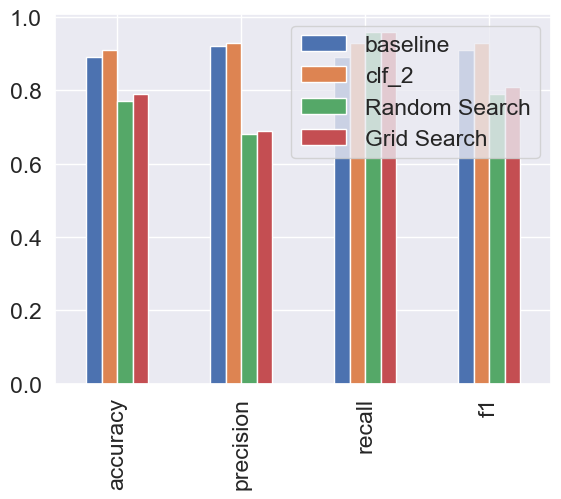

In [290]:
compare_metrics.plot.bar()

## 147. Note: Before Comparing the model make sure they are trained and tested on same datasets using random seed.

## 148. Correlation Analysis
* Forward/Backward Attribute Selection
    * Forward: Start with one column while training and keep adding attribute at a time until you get accuracy to plateau.
    * Backward: Train the model on all attributes and then slowly take away attributes or columns to train the model.

## 149. Saving and Loading A Model
### 2 Ways
* ### With Python's `pickle` module
* ### With the `joblib` module

* ### `pickle` Module
Implements binary protocols for serializing and de-serializing Python object structure.
`wb`- write binary
`rb` - read binary

In [293]:
import pickle 

pickle.dump(gs_clf,open("gs_clf_model.pkl","wb"))

In [295]:
loaded_gs_model=pickle.load(open("gs_clf_model.pkl","rb"))
loaded_gs_model

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [297]:
pickle_y_preds=loaded_gs_model.predict(x_test)
evaluate_preds_classification(y_test,pickle_y_preds)

Accuracy:78.69%
Precision:0.69
Recall:0.96
Precision:0.81


{'accuracy': 0.79, 'precision': 0.69, 'recall': 0.96, 'f1': 0.81}

## 150. Saving And Loading A Model 2

* ### `joblib` Module

In [298]:
from joblib import dump, load

dump(gs_clf,filename="gs_clf_modelusingjoblib.joblib")

['gs_clf_modelusingjoblib.joblib']

In [299]:
loaded_gs_model_joblib=load(filename="gs_clf_modelusingjoblib.joblib")

In [300]:
joblib_y_preds=loaded_gs_model_joblib.predict(x_test)
evaluate_preds_classification(y_test,joblib_y_preds)

Accuracy:78.69%
Precision:0.69
Recall:0.96
Precision:0.81


{'accuracy': 0.79, 'precision': 0.69, 'recall': 0.96, 'f1': 0.81}

* #### **Note**: `joblib` is more effecient on objects that carry large number of numpy arrays internally as is ofter the case for fitted scikit-learn estimator, but can only pickle to the disk and not to a string,

## 151. Putting it All Together

* pipeline - a way to string together number of different scikit-learn processes in on hit.
* sklearn.pipeline - pipeline of tranforms with a final estimator.

In [301]:
data=pd.read_csv("Data/car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [302]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

#### Steps:
* Fill Missing Data
* Convert Data to Numbers
* Build a model on the Data

In [304]:
# For Getting Data Ready
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# For Making the Model
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor

np.random.seed(1)
data=pd.read_csv("Data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"],inplace=True)

# Define different features and trandormer pipelines
categorical_features=["Make","Colour"]
categorical_transformer=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="constant",fill_value="missing")),
    ("onehot",OneHotEncoder(handle_unknown="ignore"))])

door_features=["Doors"]
Door_tranformer=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="constant",fill_value=4))])

numeric_features=["Odometer (KM)"]
numeric_transformer=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="mean"))])

# Setup Preprocessing Steps (Fill Missing Values and convert to numbers)
preprocessor=ColumnTransformer(transformers=[
    ("cat",categorical_transformer,categorical_features),
    ("door",Door_tranformer,door_features),
    ("numeric",numeric_transformer,num_features)])

# Creating a Preprocessing and Modelling Pipeline
model=Pipeline(steps=[("preprocessor",preprocessor),("model",RandomForestRegressor())])

# Get Data Ready
x=data.drop(["Price"],axis=1)
y=data["Price"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

model.fit(x_train,y_train)
model.score(x_test,y_test)

0.24139414708324702

## 152. Putting it All Together 2

In [317]:
from sklearn.model_selection import GridSearchCV
np.random.seed(1)
pipe_grid={
    "preprocessor__numeric__imputer__strategy":["mean","median"],
    "model__n_estimators":[100,1000],
    "model__max_depth":[None,5],
    "model__max_features":["sqrt"],
    "model__min_samples_split":[2,4]
}

gs_model=GridSearchCV(model, pipe_grid,cv=5,verbose=2)
gs_model.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__numeric__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__numeric__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__numeric__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__numeric__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__numeric__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sq

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['sqrt'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__numeric__imputer__strategy': ['mean',
                                                                      'median']},
             verbose=2)

In [318]:
gs_model.score(x_test,y_test)

0.3207988507041081

In [320]:
gs_model.best_params_

{'model__max_depth': 5,
 'model__max_features': 'sqrt',
 'model__min_samples_split': 2,
 'model__n_estimators': 100,
 'preprocessor__numeric__imputer__strategy': 'mean'}